# Building, training and evaluating the CNN 2

### Imports

In [1]:
import sys
import os
import tensorflow as tf
import numpy as np

current_dir = os.getcwd()

# Define the project root relative to the current working directory
project_root = os.path.abspath(os.path.join(current_dir, "../"))  # Adjust this based on your folder structure

# Add project_root to sys.path
sys.path.append(project_root)

from src.models.model import ModelContext, CNNModel
from src.models.train import StandardTraining, TrainingContext
from src.models.evaluate import StandardEvaluation, EvaluationContext

### Importing the dataset

In [2]:
# Load CIFAR-10 dataset from the saved files
train_data = np.load('../data/processed/cifar10_train.npz')
test_data = np.load('../data/processed/cifar10_test.npz')

x_train = train_data['x_train']
y_train = train_data['y_train']
x_test = test_data['x_test']
y_test = test_data['y_test']

### Building the model

In [3]:
# Instantiate model strategy
model_context = ModelContext(CNNModel())

In [4]:
# Build model
model = model_context.build_model()

In [5]:
# Compile model
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [6]:
# Print summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_conv (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 622,282 (2.37 MB)

 Trainable params: 621,322 (2.37 MB)

 Non-trainable params: 960 (3.75 KB)

### Training the model

In [7]:
trainer = TrainingContext(StandardTraining())

In [8]:
history = trainer.execute_training(model, x_train, y_train, x_test, y_test)

Epoch 1/4
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3286 - loss: 2.1711

782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 58ms/step - accuracy: 0.3288 - loss: 2.1702 - val_accuracy: 0.5393 - val_loss: 1.2731
Epoch 2/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.4949 - loss: 1.4032 - val_accuracy: 0.5323 - val_loss: 1.3319
Epoch 3/4
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5372 - loss: 1.2840

782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.5373 - loss: 1.2840 - val_accuracy: 0.6266 - val_loss: 1.0585
Epoch 4/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.5711 - loss: 1.2022 - val_accuracy: 0.5957 - val_loss: 1.1815


2025/03/08 12:23:33 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/03/08 12:23:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run chill-colt-268 at: http://localhost:5000/#/experiments/2/runs/54b727326a754878b073993637dbceda
🧪 View experiment at: http://localhost:5000/#/experiments/2


In [9]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5990 - loss: 1.1799
Test accuracy: 0.5957000255584717


### Model evaluation

In [10]:
# Initialize evaluation strategy
evaluator = EvaluationContext(StandardEvaluation())

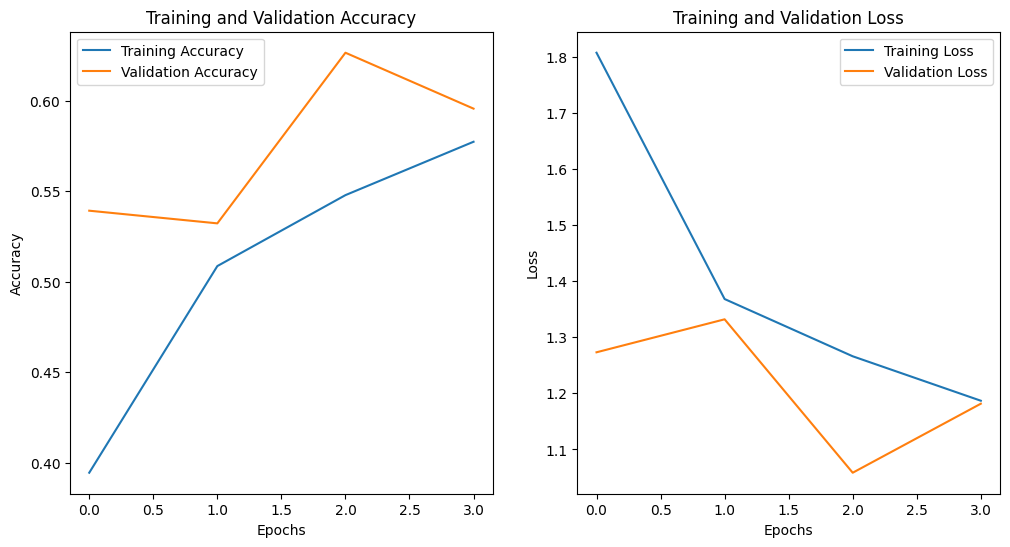

Best Validation Accuracy = 0.6266


In [11]:
# Run evaluation
best_acc = evaluator.execute_evaluation(history)